In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#loading the data
df = pd.read_csv('sample_data/processed_data.csv')
df.head()

,Job Role Title,Skills Required
0,Data Engineer,"Hadoop, Spark, SQL, Python, ETL, Big Data..."
1,Machine Learning Engineer,"Python, TensorFlow, PyTorch, Machine Learni..."
2,Data Scientist,"Python, R, Machine Learning, Statistical An..."
3,Big Data Architect,"Hadoop, Spark, Data Modeling, NoSQL, Cloud..."
4,Data Analyst,"SQL, Excel, Data Visualization, Statistics,..."


In [9]:
df.shape

(177, 2)

In [10]:
df.isnull().sum()

Job Role Title     0
Skills Required    0
dtype: int64

In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
#checking for null values
df.isnull().sum()

Job Role Title     0
Skills Required    0
dtype: int64

In [13]:
df.dtypes

Job Role Title     object
Skills Required    object
dtype: object

In [14]:
#unique values in each column
df.nunique()

Job Role Title     142
Skills Required    106
dtype: int64

In [15]:
df['Job Role Title'].unique()

array(['Data Engineer', 'Machine Learning Engineer', 'Data Scientist',
       'Big Data Architect', 'Data Analyst', 'Big Data Developer',
       'AI Research Scientist', 'Data Operations Manager',
       'Data Warehouse Engineer', 'Business Intelligence Analyst',
       'Senior Data Scientist', 'Data Engineer II',
       'Machine Learning Specialist', 'Big Data Administrator',
       'Data Science Manager', 'Data Engineer III', 'Big Data Consultant',
       'Senior Data Analyst', 'Data Scientist II', 'Big Data Analyst',
       'AI Engineer', 'Data Governance Specialist',
       'Big Data Solutions Architect', 'Data Engineer IV',
       'Machine Learning Manager', 'Data Scientist III',
       'Big Data Project Manager', 'Data Analyst II', 'Big Data Engineer',
       'Data Architect', 'Data Warehouse Developer',
       'Data Science Intern', 'Junior Data Analyst',
       'Machine Learning Intern', 'Lead Data Scientist',
       'Big Data Solutions Engineer', 'Data Science Researcher',
   

In [ ]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower()
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [16]:
#descriptive statistics
df.describe()

,Job Role Title,Skills Required
count,177,177
unique,142,106
top,Data Scientist,"SQL, ETL, Python, Hadoop, Spark, AWS, Az..."
freq,4,12


In [ ]:
import pandas as pd

df = pd.read_feather("//media/data/mbti-reddit/disprop_sample100k_total.feather") #change this to proper path
#'/content/drive/MyDrive/Colab Notebooks/clickbait_hold_X.csv'
df=df.drop(columns=['authors','subreddit'])

df=df.sample(80000, random_state=1) #random sampling


df['labels'] = df['labels'].replace(['INTP','ISTP','ENTP','ESTP','INFP','ISFP','ENFP','ESFP', \
                                     'INTJ','ISTJ','ENTJ','ESTJ','INFJ','ISFJ','ENFJ','ESFJ'], \
                                    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
df=df.rename(columns={'labels':'labels','comments':'text'})

from datasets import Dataset

dataset = Dataset.from_pandas(df)
dataset.shuffle(seed=27)
split_set = dataset.train_test_split(test_size=0.2)

from transformers import AlbertTokenizer, AlbertModel

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("albert-base-v2", num_labels=16)


def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_dataset = split_set.map(preprocess_function, batched=True)


from transformers import DataCollatorWithPadding
#tokenized_datasets = tokenized_datasets.remove_columns(books_dataset["train"].column_names)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


import evaluate
import numpy as np
def compute_metrics(eval_preds):
    metric = evaluate.combine([

    evaluate.load("precision"),
    evaluate.load("recall")])


    #evaluate.load("precision", average="weighted"),
    #evaluate.load("recall", average="weighted")])

    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels, average='weighted')


training_args = TrainingArguments(

    evaluation_strategy="epoch",
    #save_strategy="epoch",

    output_dir="/home/deimann/mbti-project/balanced_train",

    #save_total_limit=5,
    #load_best_model_at_end = True,

    learning_rate=2e-5,#2e

    per_device_train_batch_size=36  ,#16

    per_device_eval_batch_size=16,#16

    num_train_epochs=10,

    weight_decay=0.01,

)

trainer = Trainer(

    model=model,

    args=training_args,

    train_dataset=tokenized_dataset["train"],

    eval_dataset=tokenized_dataset["test"],

    tokenizer=tokenizer,

    data_collator=data_collator,

    #compute_metrics=compute_metrics,

)

trainer.train()

              Job Role Title  \
0              Data Engineer   
1  Machine Learning Engineer   
2             Data Scientist   
3         Big Data Architect   
4               Data Analyst   

                                     Skills Required  
0  Hadoop,  Spark,  SQL,  Python,  ETL,  Big Data...  
1  Python,  TensorFlow,  PyTorch,  Machine Learni...  
2  Python,  R,  Machine Learning,  Statistical An...  
3  Hadoop,  Spark,  Data Modeling,  NoSQL,  Cloud...  
4  SQL,  Excel,  Data Visualization,  Statistics,...  


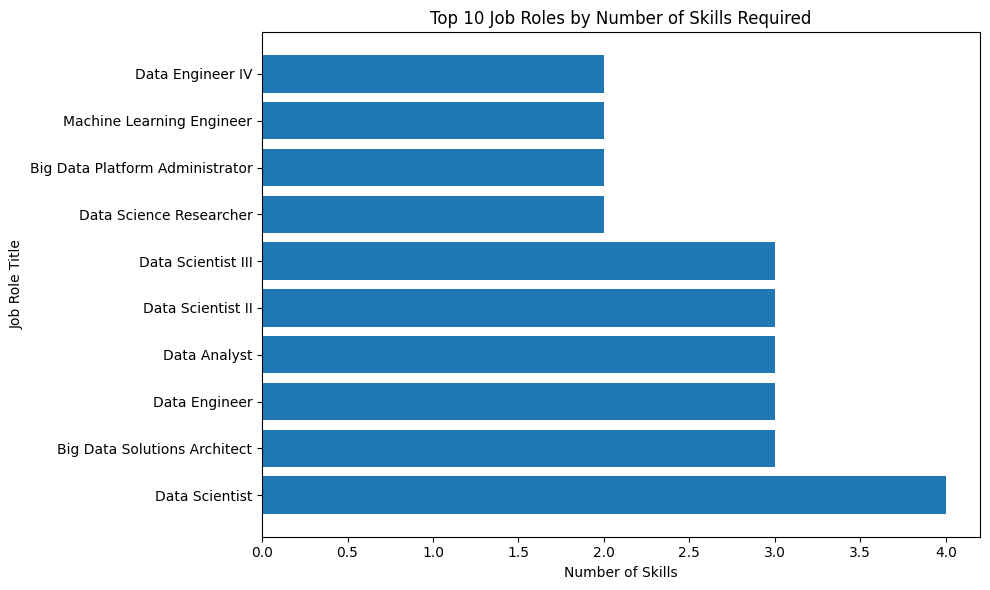

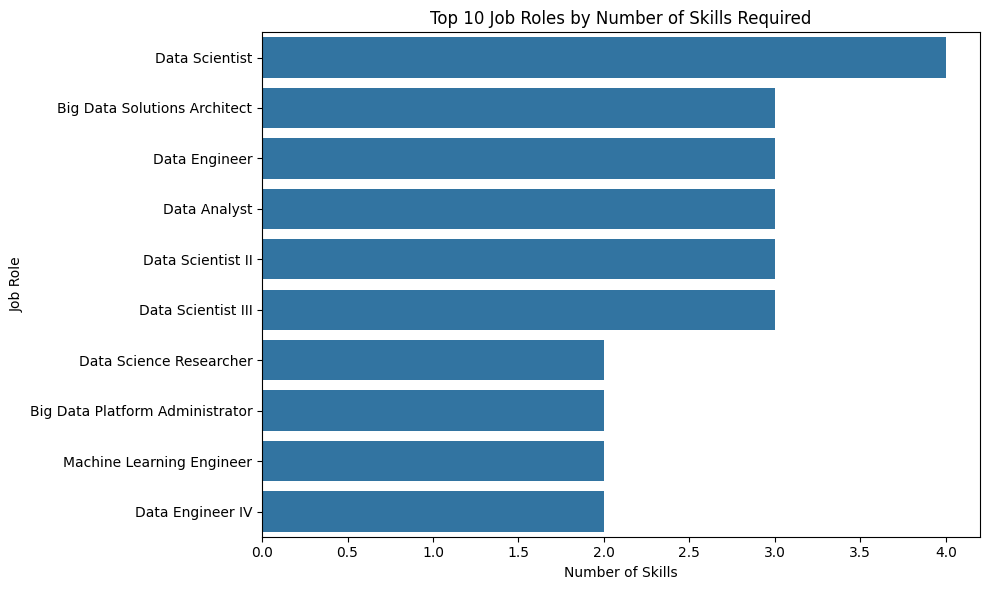

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('sample_data/processed_data.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Assuming your CSV has columns 'Job Role' and 'Skills', you can plot a bar chart
# to show the count of skills required for each job role for the first 10 items

# Count the number of skills for each job role
skills_count = df.groupby('Job Role Title')['Skills Required'].count().reset_index()

# Sort by the count of skills in descending order and select the top 10
skills_count_top10 = skills_count.sort_values(by='Skills Required', ascending=False).head(10)

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(skills_count_top10['Job Role Title'], skills_count_top10['Skills Required'])
plt.xlabel('Number of Skills')
plt.ylabel('Job Role Title')
plt.title('Top 10 Job Roles by Number of Skills Required')
plt.tight_layout()
plt.show()

# You can also use Seaborn for a more visually appealing plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Skills Required', y='Job Role Title', data=skills_count_top10)
plt.xlabel('Number of Skills')
plt.ylabel('Job Role')
plt.title('Top 10 Job Roles by Number of Skills Required')
plt.tight_layout()
plt.show()



In [9]:
pip install wordcloud


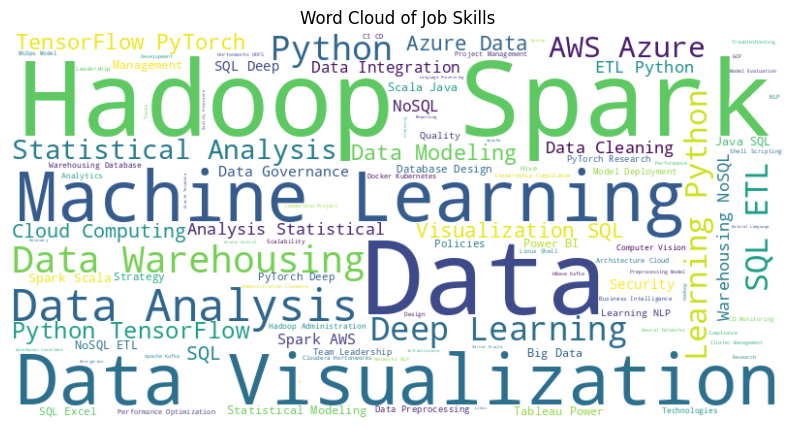

In [11]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('sample_data/processed_data.csv')

# Concatenate all skills into a single string
all_skills_text = ' '.join(df['Skills Required'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Skills')
plt.show()


In [12]:
from transformers import BertTokenizer, BertModel, XLNetTokenizer, XLNetModel

# Initialize BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Initialize XLNet tokenizer and model
xlnet_tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
xlnet_model = XLNetModel.from_pretrained('xlnet-base-cased')

# Tokenize input text for BERT and XLNet
input_text = "Example input text for tokenization."
bert_input = bert_tokenizer(input_text, return_tensors='pt')
xlnet_input = xlnet_tokenizer(input_text, return_tensors='pt')

# Get BERT and XLNet embeddings
bert_output = bert_model(**bert_input)
xlnet_output = xlnet_model(**xlnet_input)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]